In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
# Importing the training set 
data = pd.read_csv("train_set.csv")
dataset = data.iloc[:, 1:2].values

In [3]:
len(dataset)

1998

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(dataset)

In [11]:
# Creating a data structure with 60 timestens and 1 output
x_train = []
y_train = []

# Each time we split out 59 sample training data and 1 label data to train the model
# i.e. say we have nums from 1 to 6, we tell machine 1 to 5 and let machine guess what last num is,
#      if machine tells 6, which is correct, if not, then it is an error. 
for i in range(60, len(dataset)):
    x_train.append(training_set_scaled[i-60:i, 0]) 
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
# Initialising the RNN 
rnn = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
rnn.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
rnn.add(Dropout(0.2)) # Randomly turn off 20% of the units to prevent overfitting

In [15]:
# Adding the Second LSTM layer and some Dropout regularisation
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

In [16]:
# Adding the Third LSTM layer and some Dropout regularisation
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

In [17]:
# Adding the Fourth LSTM layer and some Dropout regularisation
rnn.add(LSTM(units = 50))
rnn.add(Dropout(0.2))

In [18]:
# Adding output layer
rnn.add(Dense(units = 1))

In [19]:
# Compiling RNN
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# Fitting RNN and Start training
rnn.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/100
61/61 [==============================] - 8s 58ms/step - loss: 0.0639
Epoch 2/100
61/61 [==============================] - 4s 70ms/step - loss: 0.0048
Epoch 3/100
61/61 [==============================] - 5s 83ms/step - loss: 0.0041
Epoch 4/100
61/61 [==============================] - 5s 76ms/step - loss: 0.0041
Epoch 5/100
61/61 [==============================] - 5s 78ms/step - loss: 0.0037
Epoch 6/100
61/61 [==============================] - 4s 71ms/step - loss: 0.0045
Epoch 7/100
61/61 [==============================] - 4s 72ms/step - loss: 0.0033
Epoch 8/100
61/61 [==============================] - 4s 72ms/step - loss: 0.0033
Epoch 9/100
61/61 [==============================] - 5s 77ms/step - loss: 0.0031
Epoch 10/100
61/61 [==============================] - 4s 71ms/step - loss: 0.0030
Epoch 11/100
61/61 [==============================] - 5s 74ms/step - loss: 0.0027
Epoch 12/100
61/61 [==============================] - 5s 80ms/step - loss: 0.0025
Epoch 13/100
61/61 [=====

61/61 [==============================] - 4s 72ms/step - loss: 7.3067e-04
Epoch 100/100
61/61 [==============================] - 4s 70ms/step - loss: 7.2434e-04


In [21]:
# Making Predictions and visualizing the results

dataset_test = pd.read_csv('test_set.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
# Getting the predicted stock price 
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 521):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = rnn.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

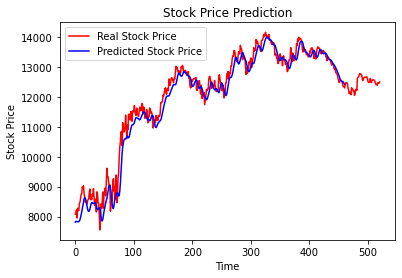

In [28]:
# Visualizing the results 
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title("Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()